In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Transformations fréquentielles

## Introduction

Le chapitre 1 nous a introduit aux fonctions de transfert des filtres passe-bas
normalisés de Butterworth, Chebyshev et Bessel. Selon les spécifications
données, on pourra choisir un type de filtre plutôt qu’un autre, et on pourra
déterminer l’ordre minimal requis pour le filtre. Par exemple, l’approximation
de Butterworth a une caractéristique de gain « plate » dans la bande
passante, et son gain chute de $20N$ dB par décade dans la bande coupée ($N$
est l’ordre du filtre). Par contre, sa bande de transition n’est pas très étroite,
ce qui peut être un problème dans certains cas. On choisira alors
l’approximation de Chebyshev qui donne un filtre plus « sélectif », i.e. dont
la bande de transition est assez étroite pour un ordre donné, mais qui par
contre présente des oscillations (ronflement) dans la bande passante. On
doit donc faire un choix qui dépend des compromis possibles selon
l’application.

Mais pour l’instant, nous n’avons vu que les filtres passe-bas, et normalisés
en plus i.e. dont la bande passante va de 0 à 1 rad/sec. On voudrait pouvoir
généraliser ce que nous savons de ces approximations du passe-bas idéal à
d’autres types de filtres comme les passe-haut et les passe-bande.
C’est le but de ce chapitre, qui montre comment on peut dénormaliser la
fonction de transfert d’un filtre passe-bas normalisé pour produire la fonction
de transfert d’un filtre désiré de type passe-bas (de fréquence de coupure
quelconque), passe-haut, passe-bande ou coupe-bande. Ainsi, en ayant bien
fait la conception de la fonction de transfert d’un passe-bas normalisé, de
façon à rencontrer les tolérances fixées lorsqu’on les ramène à la bande
basse normalisée, on peut ensuite produire la fonction de transfert requise
en appliquant une transformation fréquentielle à la variable $s$ (c’est ce que
l’on appelle dénormaliser le filtre).

Nous allons présenter dans les quatre prochaines sections un exemple de
chacune des quatre transformations fréquentielles nécessaires pour obtenir
la fonction de transfert d’un passe-bas, d’un passe-haut, d’un passe-bande
et d’un coupe-bande, tous dénormalisés, à partir de la fonction de transfert
d’un passe-bas normalisé. Dans les exemples ci-dessous, nous allons
appliquer la transformation fréquentielle à un filtre passe-bas normalisé
d’ordre 1 ou 2, selon le cas, de façon à toujours obtenir un polynôme d’ordre
2 au dénominateur après la transformation. Ce sont en effet des fonctions
de transfert d’ordre 2 qui seront, par la suite, réalisées sous forme de circuit.

## Transformation 1 : pour obtenir un passe-bas

Soit la fonction de transfert suivante, définissant un filtre passe-bas
Butterworth normalisé d’ordre $N = 2$ :

\begin{equation}
H(s) = \frac{1}{s^2 + 1.4141s + 1}
\label{eq:butter2} \tag{1}
\end{equation}

On a montré dans le chapitre 1 que la bande passante de ce filtre va de 0 à
1 radian par seconde, ce qui revient à dire, puisqu’il s’agit d’un Butterworth,
que sa fréquence de coupure est $\omega_c = 1$ radian/seconde. La figure ci-dessous
montre le module de ce filtre pour $\omega$ entre 0 et 2 radians par seconde.

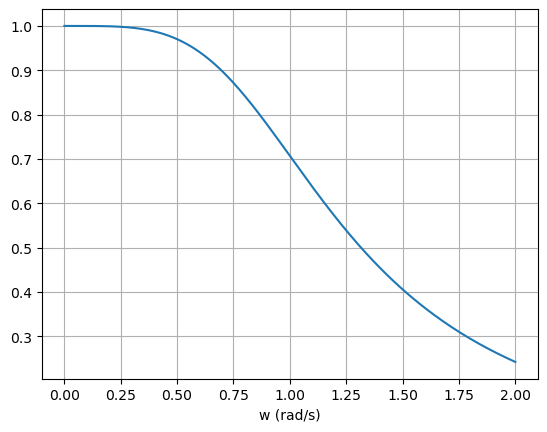

In [2]:
w = np.linspace(0, 2, 200)
b1, a1 = signal.butter(2, 1, analog=True)
w1, h1 = signal.freqs(b1, a1, w)

plt.plot(w1, np.abs(h1))
plt.xlabel('w (rad/s)')
plt.grid()

On demande d’appliquer la transformation fréquentielle nécessaire pour obtenir la fonction de transfert d’un filtre passe-bas Butterworth d’ordre 2 et
de fréquence de coupure $\omega_c = 1000$ radians/seconde. Le changement de variable à opérer sur la variable $s$ est le suivant :

$$
\boxed{s = \frac{s}{\omega_c}}
$$

En appliquant ce changement de variable à l’équation (1), la fonction de
transfert $H_PB(s)$ recherchée est donc la suivante :

$$
H_{PB}(s)=\left.\frac{1}{s^2+1.4141 s+1}\right|_{s=\frac{s}{\omega_c}}=\left.\frac{1}{s^2+1.4141 s+1}\right|_{s=\frac{s}{1000}}
$$

On obtient alors

$$
H_{L P}(s) \quad =\frac{1}{\left(\frac{s}{1000}\right)^2+1.4141 \frac{s}{1000}+1} =\frac{1000^2}{s^2+1414 s+1000^2}
$$

Notez que l’on obtient une fonction de transfert de même ordre que celle du filtre passe-bas normalisé. Dans le cas général, cette fonction de transfert d’ordre 2, correspondant à un filtre passe-bas, s’écrit

$$
H_{L P}(s)=\frac{K \omega_c^2}{s^2+\frac{\omega_c}{Q} s+\omega_c^2}=\frac{K \omega_c^2}{s^2+2 \varsigma \omega_c s+\omega_c^2}
$$

où $Q$ est le facteur de qualité du filtre, $\varsigma$ est le facteur d’amortissement (« damping ») et $K$ est le gain DC (ici égal à 1). Dans la cas spécifique du passe-bas d’ordre 2 de type Butterworth, on a $Q$ = 0.707 comme on peut le calculer avec l'équation du passe-bas avec fréquence de coupure à 10000 Hz et l'équation de passe-bas standard, sachant que $\omega_c = 1000$. La figure ci-dessous présente le module du filtre obtenu après transformation fréquentielle. Il s’agit bien d’un passe-bas de fréquence de coupure $\omega_c = 1000$ radians par seconde.

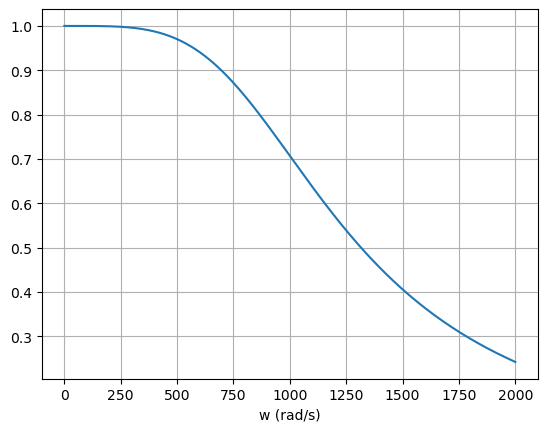

In [3]:
wc=1000
w2 = np.linspace(0, 2000, 200)

b2 = b1 * wc**2
a2 = np.zeros_like(a1)
a2[0] = a1[0]
a2[1] = a1[1]*wc
a2[2] = a1[2] * wc**2

w2, h2 = signal.freqs(b2, a2, w2)

plt.plot(w2, np.abs(h2))
plt.xlabel('w (rad/s)')
plt.grid()

## Autres transformations

Un fonction de transfert normalisée peut être transformée en passe-haut, passe-bande ou coupe-bande avec les transformations aprropriées. Celles-ci ne sont pas vues dans le cadre du cours GEL265, mais sont présentées ici à titre de référence. 

Passe-haut :
\begin{equation}
\boxed{s = \frac{\omega_c}{s}}
\label{eq:passe-haut} \tag{5}
\end{equation}

Passe-bande :
\begin{equation}
\boxed{s = \frac{s^2 + \omega_a \omega_b}{(\omega_b - \omega_a)s}}
\label{eq:passe-bande} \tag{6}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquenced que l'on veut laisser passer.

Coupe-bande :
\begin{equation}
\boxed{s = \frac{(\omega_b - \omega_a)s}{s^2 + \omega_a \omega_b}}
\label{eq:coupe-bande} \tag{7}
\end{equation}

où $\omega_b$ et $\omega_a$ sont les fréquences limites haute et basse de la bande de fréquences que l'on veut couper.

## Décomposition en sous-fonctions d’ordre 2

Lorsque l’on a obtenu la fonction de transfert $H(s)$ du filtre désiré, après
transformation fréquentielle du passe-bas normalisé sélectionné, on peut se
retrouver avec une fonction d’ordre $N$ relativement élevé. Les circuits de
filtres que nous allons voir au chapitre 4 sont tous des **circuits d’ordre 2**.
Ainsi, il faut maintenant étudier, à l’aide d’un exemple, comment utiliser
plusieurs étages d’ordre 2 pour réaliser un filtre d’ordre $N$.

Puisque l’on peut factoriser tout polynôme d’ordre $N$ en facteurs d’ordre
inférieur (par exemple, en polynômes d’ordre 2 si $N$ est pair), la réalisation
d’un filtre d’ordre $N$ revient à mettre en cascade des filtres d’ordre 2 à
coefficients réels. Il s’agit simplement de distribuer les racines (les pôles) du
filtre d’ordre $N$ aux filtres d’ordre 2 en cascade, de façon à former des
fonctions de transfert à coefficients réels. Spécifiquement, chaque étage
d’ordre 2 aura comme pôles une paire de pôles conjugués du filtre d’ordre $N$.

Illustrons cette démarche par un exemple, en utilisant les fonctions `numpy`
pour factoriser les polynômes (i.e. en extraire les racines) et reconstruire les
fonctions de transfert d’ordre 2 à mettre en cascade. Nous aurons besoin
pour ceci des fonctions suivantes :

- [`numpy.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) calcule les racines d’un polynôme
- [`numpy.poly`](https://numpy.org/doc/stable/reference/generated/numpy.poly.html)  forme un polynôme à partir de ses racines

#### Exemple

Soit un filtre passe-bas d’ordre 4 dont la fonction de transfert est donnée par:

\begin{equation}
H(s)=\frac{16 \times 10^8}{s^4+141 s^3+50000 s^2+2.83 \times 10^6 s+4 \times 10^8}
\label{eq:ex4} \tag{8}
\end{equation}

On désire obtenir deux fonctions de transfert d’ordre 2, soient $H_1(s)$ et $H_2(s)$
telles que

\begin{equation}
H(s)=H_1(s) H_2(s)
\label{eq:ex4a} \tag{9}
\end{equation}

On veut aussi connaître le facteur de qualité de chacun des filtres d’ordre 2
obtenus.

Pour décomposer $H(s)$ en fonctions d’ordre 2, il faut d’abord déterminer les
pôles de $H(s)$ i.e. les racines du dénominateur, de façon à les grouper par
paires conjuguées et former le dénominateur de $H_1(s)$ et $H_2(s)$. Le calcul des
racines d’un polynôme d’ordre supérieur à deux n’est pas une chose triviale,
aussi Python est utilisé pour faciliter ce calcul.

```python
a = [1, 141, 50000, 2.83e6, 4e8]
r = np.roots(a)
```

```
a = 
[-43.8203156+177.19431369j
 -43.8203156-177.19431369j
 -26.6796844+106.27182512j 
 -26.6796844-106.27182512j]
 ```
 
On obtient bien 4 racines, qui viennent par paires conjuguées. On peut donc
reconstruire deux polynômes d’ordre 2 en ne retenant que les deux
premières racines pour $H_1(s)$ et les deux dernières racines pour $H_2(s)$.

```python
a1 = np.poly(r[0:2])
a2 = np.poly(r[2:4])
```


```
a1 = 
[1.00000000e+00 8.76406312e+01 3.33180449e+04]

a2 = 
[1.00000000e+00 5.33593688e+01 1.20055064e+04]
 ```
 
On a formé deux polynômes, `a1` et `a2`, avec la
fonction `np.poly` dont les arguments sont les racines retenues pour chaque
polynôme. Remarquez que l’on pris soin de choisir les
racines complexes conjuguées pour former chacun des polynômes afin
d’obtenir des coefficients réels.

Maintenant, pour donner les numérateurs de $H_1(s)$ et $H_2(s)$, on pourrait décider
de simplement répartir « également » le numérateur de $H(s)$ entre les deux
sous fonctions. A l’équation \eqref{ex4}, le numérateur de $H(s)$ est $16 \times 10^8$, de
sorte que l’on pourrait prendre $4 \times 10^4$ (la racine de $16 \times 10^8$) comme
numérateur de $H_1(s)$ et de $H_2(s)$. On aurait alors les polynômes d’ordre 2
suivants :

\begin{equation}
\begin{aligned}
& H_1(s)=\frac{40 000}{s^2+87.6 s+33318} \\
& H_2(s)=\frac{40 000}{s^2+53.4 s+12006}
\end{aligned}
\label{eq:ex4decomp} \tag{10}
\end{equation}

On montre facilement que le produit de $H_1(s)$ avec $H_2(s)$ donne la fonction
de transfert d’ordre 4 de l’équation \eqref{eq:ex4} (à une erreur d’arrondi près).

Cependant, en faisant ce choix pour les numérateurs, puisque pour un
passe-bas le numérateur est $K\omega_c^2$ , et que le terme $\omega_c^2$ n’est pas le
même pour chacun des filtres (33 318 et 12 006), on obtient des filtres dont le
gain $K$ dans la bande passante n’est pas le même. **Pour obtenir des filtres de
même gain, ce qui apparaît souhaitable a priori**, on va plutôt écrire

\begin{equation}
\begin{aligned}
&\begin{aligned}
& K_1 \omega_{c1}^2 \times K_2 \omega_{c2}^2 = 4 \times 10^8 \\
& K_1=K_2=K \\
& \omega_{c1}^2 = 33318 \quad \omega_{c2}^2 = 12006
\end{aligned}\\
&K=2
\end{aligned}
\label{eq:ex4calculgain} \tag{11}
\end{equation}

et, avec de petites erreurs d’arrondi, on obtient les fonctions de transfert
suivantes des deux filtres d’ordre 2

\begin{equation}
\begin{aligned}
& H_1(s)=\frac{66636}{s^2+87.6 s+33318} \\
& H_2(s)=\frac{24012}{s^2+53.4 s+12006}
\end{aligned}
\label{eq:ex4gains} \tag{12}
\end{equation}

Il serait maintenant assez facile de réaliser le filtre d’ordre 4 de l’équation
\eqref{eq:ex4} en mettant en cascade (en série) les deux filtres passe-bande d’ordre 2
définis à l’équation \eqref{eq:ex4gains}. On peut à cette fin utiliser des filtres actifs (c’est ce
que nous allons faire) sinon des structures passives sont aussi possibles. En
ramenant toujours les filtres d’ordres élevés à une série de filtres d’ordre 2,
on permet de les réaliser « simplement » avec des structures connues d’ordre
2. Nous verrons, au chapitre 4, des structures de filtres actifs d’ordre 2.

La figure suivante présente le module en dB du filtre d’ordre 4 (en trait
plein), de même que le module en dB des deux filtres d’ordre 2 définis à
l’équation \eqref{eq:ex4gains}. Notez qu’en faisant la somme des gains en dB des filtres
d’ordre 2 (courbes pointillées), on obtient le gain du filtre d’ordre 4. Ceci est
normal puisque le produit des fonctions de transfert $H_1(s)$ et $H_2(s)$ (dont le
gain total est le produit des gains individuels) devient une somme sur
l’échelle logarithmique des dB.


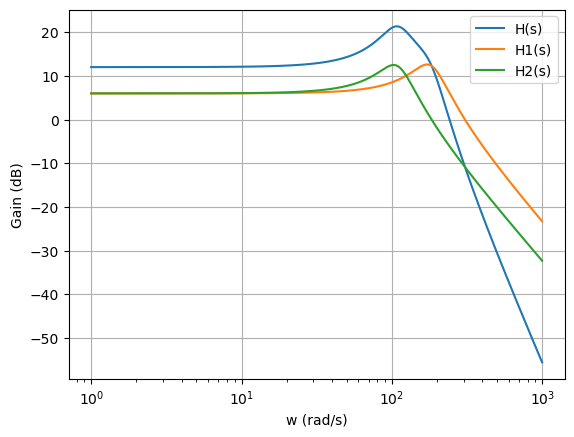

In [11]:
a = [1, 141, 50000, 2.83e6, 4e8]
b = [16e8]
K = np.sqrt(b[0] / a[-1])
r = np.roots(a)

a1 = np.poly(r[0:2])
a2 = np.poly(r[2:4])

w = np.logspace(0, 3, 1000)
w, h = signal.freqs(b, a, w)
w1, h1 = signal.freqs([K*a1[-1]], a1, w)
w2, h2 = signal.freqs([K*a2[-1]], a2, w)

plt.semilogx(w, 20*np.log10(np.abs(h)))
plt.plot(w1, 20*np.log10(np.abs(h1)))
plt.plot(w2, 20*np.log10(np.abs(h2)))
plt.xlabel('w (rad/s)')
plt.ylabel('Gain (dB)')
plt.grid()
plt.legend(['H(s)', 'H1(s)' , 'H2(s)'])